In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-roads-dataset/Dataset3Class/UnPavedRoad__686.txt
/kaggle/input/indian-roads-dataset/Dataset3Class/frame+346.txt
/kaggle/input/indian-roads-dataset/Dataset3Class/UnPavedRoad__1043.txt
/kaggle/input/indian-roads-dataset/Dataset3Class/UnPavedRoad__527.txt
/kaggle/input/indian-roads-dataset/Dataset3Class/UnMarkedBump_355.txt
/kaggle/input/indian-roads-dataset/Dataset3Class/SB__103.txt
/kaggle/input/indian-roads-dataset/Dataset3Class/UnMarkedBump_301.jpg
/kaggle/input/indian-roads-dataset/Dataset3Class/frame+352.jpg
/kaggle/input/indian-roads-dataset/Dataset3Class/PotHoles_715.jpg
/kaggle/input/indian-roads-dataset/Dataset3Class/UnPavedRoad__133.jpg
/kaggle/input/indian-roads-dataset/Dataset3Class/AN_unpaved_207.txt
/kaggle/input/indian-roads-dataset/Dataset3Class/UngradedRoad_40.txt
/kaggle/input/indian-roads-dataset/Dataset3Class/PotHoles_409.txt
/kaggle/input/indian-roads-dataset/Dataset3Class/UnPavedRoad__856.txt
/kaggle/input/indian-roads-dataset/Dataset3Class/PotH

In [4]:
import cv2
import matplotlib.pyplot as plt
import os


In [5]:

def visualize_yolo_annotations(image_path, label_path, class_names):
    """
    Visualize YOLO-format annotations on an image.
    :param image_path: Path to the image file (.jpg).
    :param label_path: Path to the corresponding YOLO label file (.txt).
    :param class_names: List of class names corresponding to class IDs in labels.
    """
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    # Read YOLO annotations
    if not os.path.exists(label_path):
        print(f"Label file not found: {label_path}")
        return
    
    with open(label_path, 'r') as f:
        annotations = f.readlines()

    for ann in annotations:
        class_id, x_center, y_center, box_width, box_height = map(float, ann.split())
        class_id = int(class_id)

        # Convert YOLO format to pixel coordinates
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Add class name
        label = class_names[class_id]
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')
    plt.show()


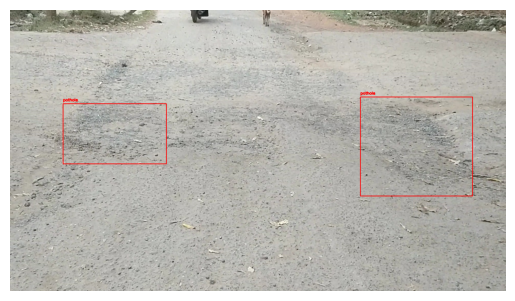

In [6]:

# Example usage
image_path = '/kaggle/input/indian-roads-dataset/Dataset3Class/AN_unpaved_207.jpg'  # Replace with your image path
label_path = '/kaggle/input/indian-roads-dataset/Dataset3Class/AN_unpaved_207.txt'  # Replace with your label path
class_names = ['speed-breaker', 'pothole', 'poor-road']  # Replace with your class names
visualize_yolo_annotations(image_path, label_path, class_names)


In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the folder containing all files
data_dir = '/kaggle/input/indian-roads-dataset/Dataset3Class'
output_dir = '/kaggle/working/dataset'

# Create the organized folder structure
os.makedirs(f"{output_dir}/images/train", exist_ok=True)
os.makedirs(f"{output_dir}/images/val", exist_ok=True)
os.makedirs(f"{output_dir}/images/test", exist_ok=True)
os.makedirs(f"{output_dir}/labels/train", exist_ok=True)
os.makedirs(f"{output_dir}/labels/val", exist_ok=True)
os.makedirs(f"{output_dir}/labels/test", exist_ok=True)

# Separate images and labels
all_images = sorted([f for f in os.listdir(data_dir) if f.endswith('.jpg')])
all_labels = sorted([f for f in os.listdir(data_dir) if f.endswith('.txt')])

# Ensure corresponding image and label files match
image_basename = [os.path.splitext(img)[0] for img in all_images]
label_basename = [os.path.splitext(lbl)[0] for lbl in all_labels]
assert set(image_basename) == set(label_basename), "Mismatch between images and labels"

# Train-validation-test split
train_imgs, test_imgs = train_test_split(all_images, test_size=0.2, random_state=42)
val_imgs, test_imgs = train_test_split(test_imgs, test_size=0.5, random_state=42)

# Move files to respective folders
def move_files(file_list, src_dir, dest_dir, file_extension):
    for file_name in file_list:
        base_name = os.path.splitext(file_name)[0]
        shutil.copy(os.path.join(src_dir, f"{base_name}.{file_extension}"), dest_dir)

move_files(train_imgs, data_dir, f"{output_dir}/images/train", "jpg")
move_files(train_imgs, data_dir, f"{output_dir}/labels/train", "txt")
move_files(val_imgs, data_dir, f"{output_dir}/images/val", "jpg")
move_files(val_imgs, data_dir, f"{output_dir}/labels/val", "txt")
move_files(test_imgs, data_dir, f"{output_dir}/images/test", "jpg")
move_files(test_imgs, data_dir, f"{output_dir}/labels/test", "txt")

print("Dataset organized successfully!")


Dataset organized successfully!


In [8]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 27), reused 26 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.68 MiB | 1.03 MiB/s, done.
Resolving deltas: 100% (11717/11717), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 33.4 MB/s eta 0:00:00


In [9]:
# Path where you want to save the YAML file
yaml_path = '/kaggle/working/roads_dataset.yaml'

# YAML content
yaml_content = """
train: /kaggle/working/dataset/images/train
val: /kaggle/working/dataset/images/val
test: /kaggle/working/dataset/images/test

nc: 3
names: ['speed-breaker', 'pothole', 'poor-road']
"""

# Write the YAML content to a file
with open(yaml_path, 'w') as file:
    file.write(yaml_content)

print(f"YAML file created at {yaml_path}")


YAML file created at /kaggle/working/roads_dataset.yaml


In [10]:
!ls /kaggle/working/


dataset  roads_dataset.yaml  yolov5


In [11]:
!python train.py --img 640 --batch 16 --epochs 50 --data /kaggle/working/roads_dataset.yaml --weights yolov5s.pt --cache


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/roads_dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False,

In [12]:
!python val.py --weights runs/train/exp/weights/best.pt --data /kaggle/working/roads_dataset.yaml --img 640


val: data=/kaggle/working/roads_dataset.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /kaggle/working/dataset/labels/val.cache... 446 images, 0 backgrou
                 Class     Images  Instances          P          R      mAP50   
                   all        446        570      0.816       0.82      0.831      0.511
         speed-breaker        446        127      0.934      0.882      0.885      0.542
               pothole        446        230      0.664      0.705      0.694      0.339
             poor-road

In [13]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /kaggle/working/dataset/images/test


detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/working/dataset/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/447 /kaggle/working/dataset/images/test/AN_unpaved_111.jpg: 384x640 1 pothole, 31.7ms
image 2/447 /kaggle/working/dataset/images/test/AN_unpaved_125.jpg: 384x640 1 pothole, 7.6ms
image 3/447 /kaggle/working/dataset/images/test/AN_unpaved_143.jpg: 384x640 1 pothole, 7.5ms
image 4/447 /kaggle/work

In [14]:
!ls runs/detect/exp


 AN_unpaved_111.jpg		 SB__248.jpg		 UnPavedRoad__330.jpg
 AN_unpaved_125.jpg		 SB__37.jpg		 UnPavedRoad__339.jpg
 AN_unpaved_143.jpg		 SB__48.jpg		 UnPavedRoad__345.jpg
 AN_unpaved_145.jpg		 SB__52.jpg		 UnPavedRoad__357.jpg
 AN_unpaved_150.jpg		 SB__60.jpg		 UnPavedRoad__359.jpg
 AN_unpaved_170.jpg		 SB__62.jpg		 UnPavedRoad__36.jpg
 AN_unpaved_181.jpg		 SB__71.jpg		 UnPavedRoad__369.jpg
 AN_unpaved_220.jpg		 SB__89.jpg		 UnPavedRoad__383.jpg
 AN_unpaved_232.jpg		 SB__9.jpg		 UnPavedRoad__409.jpg
 AN_unpaved_239.jpg		 Speed_10.jpg		 UnPavedRoad__412.jpg
 AN_unpaved_249.jpg		 Speed_103.jpg		 UnPavedRoad__43.jpg
 AN_unpaved_25.jpg		 Speed_119.jpg		 UnPavedRoad__449.jpg
 AN_unpaved_250.jpg		 Speed_135.jpg		 UnPavedRoad__460.jpg
 AN_unpaved_263.jpg		 Speed_167.jpg		 UnPavedRoad__473.jpg
 AN_unpaved_277.jpg		 Speed_171.jpg		 UnPavedRoad__476.jpg
 AN_unpaved_278.jpg		 Speed_182.jpg		 UnPavedRoad__48.jpg
 AN_unpaved_281.jpg		 Speed_186.jpg		 UnPavedRoad__484.jpg
 AN_unpaved_285.jpg		 Speed_1

In [23]:
import os

# Check if the 'runs' directory exists and list its contents
output_dir = '/kaggle/working/yolov5'
os.listdir(output_dir)


['.dockerignore',
 'hubconf.py',
 'yolov5s.pt',
 'CITATION.cff',
 'pyproject.toml',
 'README.md',
 'utils',
 'detect.py',
 '.git',
 'requirements.txt',
 'CONTRIBUTING.md',
 'tutorial.ipynb',
 'runs',
 'segment',
 '.gitignore',
 'models',
 'data',
 'README.zh-CN.md',
 '__pycache__',
 'benchmarks.py',
 '.github',
 '.gitattributes',
 'train.py',
 'LICENSE',
 'classify',
 'export.py',
 'val.py']

In [26]:
output_dir = '/kaggle/working/yolov5/runs/detect/exp'
os.listdir(output_dir)


['UnMarkedBump_435.jpg',
 'UnMarkedBump_146.jpg',
 'UnPavedRoad__1270.jpg',
 'PotHoles_378.jpg',
 'PotHoles_95.jpg',
 'UnPavedRoad__359.jpg',
 'SB__245.jpg',
 'SB__214.jpg',
 'UnMarkedBump_186.jpg',
 'UngradedRoad_53.jpg',
 'PotHoles_plus_unpaved_164.jpg',
 'SB__144.jpg',
 'UnPavedRoad__255.jpg',
 'UnPavedRoad__149.jpg',
 'UnPavedRoad__484.jpg',
 'UngradedRoad_82.jpg',
 'PotHoles_293.jpg',
 'PotHoles_500.jpg',
 'UngradedRoad_150.jpg',
 'frame+376.jpg',
 'SB__235.jpg',
 'UngradedRoad_154.jpg',
 'UnMarkedBump_25.jpg',
 'UnPavedRoad__36.jpg',
 'UngradedRoad_238.jpg',
 'PotHoles_868.jpg',
 'UnPavedRoad__1055.jpg',
 'Speed_62.jpg',
 'UnMarkedBump_351.jpg',
 'SB__127.jpg',
 'SB__62.jpg',
 'UnPavedRoad__1234.jpg',
 'SB__48.jpg',
 'UnPavedRoad__932.jpg',
 'UnPavedRoad__941.jpg',
 'UnPavedRoad__937.jpg',
 'frame+174.jpg',
 'PotHoles_78.jpg',
 'frame+636_.jpg',
 'AN_unpaved_54.jpg',
 'UnPavedRoad__67.jpg',
 'UnPavedRoad__980.jpg',
 'Speed_167.jpg',
 'UnMarkedBump_181.jpg',
 'UnPavedRoad__1289.jp

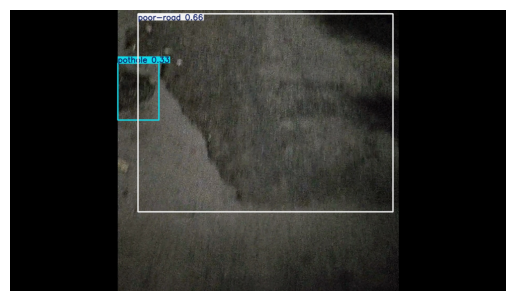

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

# Update the image path based on the available images in the output folder
img_path = '/kaggle/working/yolov5/runs/detect/exp/PotHoles_96.jpg'  # Replace with a valid image file from the list

# Open the image
img = Image.open(img_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis for cleaner view
plt.show()


In [31]:
!python /kaggle/working/yolov5/detect.py --source /kaggle/input/pothole/potholes.mp4 --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --img 640 --save-txt --save-csv --save-crop


detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/input/pothole/potholes.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/692) /kaggle/input/pothole/potholes.mp4: 384x640 (no detections), 31.2ms
video 1/1 (2/692) /kaggle/input/pothole/potholes.mp4: 384x640 1 pothole, 7.5ms
video 1/1 (3/692) /kaggle/input/pothole/potholes.mp4: 384x640 1 pothole, 7.6ms
video 1/1 (4/692) /kaggle/input/pothole/p

In [35]:
import os

# List the contents of the 'runs/detect/exp' folder to locate the output video
output_dir = '/kaggle/working/yolov5/runs/detect/exp2'
os.listdir(output_dir)


['predictions.csv', 'labels', 'potholes.mp4', 'crops']

In [39]:
os.listdir(output_dir)


['predictions.csv', 'labels', 'potholes.mp4', 'crops']